In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
#from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

Using TensorFlow backend.


/home/jupyter/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/jupyter/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/jupyter/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/jupyter/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/jupyter/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


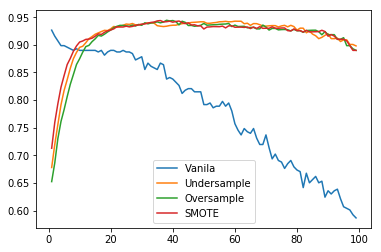

In [2]:
df = pd.read_csv('../Data/train.csv', header=0)
X = df.iloc[:,0:-1].copy()
Y = df.iloc[:, -1].copy()

#scaler = StandardScaler()
#X = scaler.fit_transform(X)

df = pd.read_csv('../Data/validation.csv', header=0)
X_valid = df.iloc[:,0:-1].copy()
Y_valid = df.iloc[:, -1].copy()
#scaler = StandardScaler()
#X_valid = scaler.fit_transform(X_valid)

# Handle the dataset with undersampling strategy
rus = RandomUnderSampler(sampling_strategy=0.8)
X_res, Y_res = rus.fit_resample(X, Y)

# Handle the dataset with oversampling strategy
ros = RandomOverSampler(random_state=0)
X_resampled, Y_resampled = ros.fit_resample(X, Y)

# Handle the dataset with SMOTE
SM = SMOTE(random_state=0)
X_smote, Y_smote = SM.fit_sample(X, Y)

score_infor = [[],[],[],[]]
roc_auc_score_infor = [[],[],[],[]]

#print(pd.value_counts(Y_smote))
for weight_percent in range(1, 100):

    class_weight = {0: weight_percent, 1: (100-weight_percent)}

    lr = LogisticRegression(random_state=0, class_weight=class_weight, solver='lbfgs')
    classifier = lr.fit(X, Y)
    #classifier_probs = classifier.predict_proba(X_valid)
    #print("Classifer with balanced class weight only: ")
    Y_predit = classifier.predict(X_valid)
    #print(classification_report(Y_valid, Y_predit))
    score_infor[0].append(classification_report(Y_valid, Y_predit))
    roc_auc_score_infor[0].append(roc_auc_score(Y_valid, Y_predit))
    


    #print(pd.value_counts(Y_res))

    #class_weight = {0: 5, 1: 4}
    lr = LogisticRegression(random_state=0, class_weight=class_weight, solver='lbfgs')
    classifier = lr.fit(X_res, Y_res)
    #print("Classifer with undersampling dataset: ")
    Y_predit = classifier.predict(X_valid)
    #print(classification_report(Y_valid, Y_predit))
    #roc_auc_score(Y_valid, Y_predit)
    score_infor[1].append(classification_report(Y_valid, Y_predit))
    roc_auc_score_infor[1].append(roc_auc_score(Y_valid, Y_predit))


    #print(pd.value_counts(Y_resampled))

    #class_weight = {0: 90, 1: 10}
    lr = LogisticRegression(random_state=0, class_weight=class_weight, solver='lbfgs')
    classifier = lr.fit(X_resampled, Y_resampled)
    #print("Classifer with oversampling dataset: ")
    Y_predit = classifier.predict(X_valid)
    #print(classification_report(Y_valid, Y_predit))
    score_infor[2].append(classification_report(Y_valid, Y_predit))
    roc_auc_score_infor[2].append(roc_auc_score(Y_valid, Y_predit))


    #class_weight = {0: 90, 1: 10}
    lr = LogisticRegression(random_state=0, class_weight=class_weight, solver='lbfgs')
    classifier = lr.fit(X_smote, Y_smote)
    #print("Classifer with SMOTE on dataset: ")
    Y_predit = classifier.predict(X_valid)
    #print(classification_report(Y_valid, Y_predit))
    score_infor[3].append(classification_report(Y_valid, Y_predit))
    roc_auc_score_infor[3].append(roc_auc_score(Y_valid, Y_predit))

x = np.linspace(1, 99, num=99)
plt.plot(x, roc_auc_score_infor[0], label="Vanila")
plt.plot(x, roc_auc_score_infor[1], label="Undersample")
plt.plot(x, roc_auc_score_infor[2], label="Oversample")
plt.plot(x, roc_auc_score_infor[3], label="SMOTE")
plt.legend(loc='best')
plt.show()